In [1]:
from cartpole import *

In [2]:
controller = nn.Sequential(nn.Linear(4, 10), nn.Tanh(), nn.Linear(10, 1))
system = CartPole(controller)
loss = CartPoleLossAlt()
learner = ControlLearner(
    system,
    loss,
    n_trajectories=1000,
    batch_size=10,
    time_span=torch.linspace(0, 10, 100, dtype=torch.float32),
    ode_params={},
)
trainer = pl.Trainer(min_epochs=1, max_epochs=2)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/gooplancton/projects/neural_ode/torch_nodec/.venv/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(


In [5]:
trainer.fit(learner)

/home/gooplancton/projects/neural_ode/torch_nodec/.venv/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:612: UserWarning: Checkpoint directory /home/gooplancton/projects/neural_ode/torch_nodec/lightning_logs/version_3/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")

  | Name   | Type            | Params
-------------------------------------------
0 | system | CartPole        | 61    
1 | loss   | CartPoleLossAlt | 0     
2 | ode    | NeuralODE       | 61    
-------------------------------------------
61        Trainable params
0         Non-trainable params
61        Total params
0.000     Total estimated model params size (MB)


Training: 74it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=2` reached.


In [11]:
x0 = learner.train_dataloader().dataset[0].unsqueeze(0)
times, trajectory, controls = learner.forward(x0)

In [15]:
controls.squeeze()

tensor([-0.0585, -0.0585, -0.0353, -0.0043,  0.0418,  0.1140,  0.2290,  0.4066,
         0.6535,  0.9375,  1.1999,  1.3854,  1.4261,  1.1920,  0.7396,  0.4386,
         0.2641,  0.1352,  0.0162, -0.1163, -0.2777, -0.4689, -0.6600, -0.7773,
        -0.7707, -0.6876, -0.5784, -0.4477, -0.2748, -0.0291,  0.3108,  0.7026,
         1.0419,  1.2521,  1.2341,  0.8648,  0.4756,  0.2467,  0.0719, -0.0981,
        -0.2816, -0.4744, -0.6442, -0.7347, -0.7186, -0.6367, -0.5248, -0.3756,
        -0.1590,  0.1564,  0.5467,  0.8803,  1.0006,  0.7772,  0.4425,  0.2341,
         0.0717, -0.0967, -0.2833, -0.4718, -0.6167, -0.6667, -0.6232, -0.5330,
        -0.4146, -0.2537, -0.0271,  0.2769,  0.5764,  0.6811,  0.5148,  0.3153,
         0.1763,  0.0416, -0.1161, -0.2968, -0.4681, -0.5708, -0.5725, -0.5086,
        -0.4149, -0.2911, -0.1259,  0.0938,  0.3334,  0.4493,  0.3738,  0.2604,
         0.1631,  0.0514, -0.0899, -0.2568, -0.4130, -0.4982, -0.4924, -0.4340,
        -0.3462, -0.2290, -0.0772,  0.10

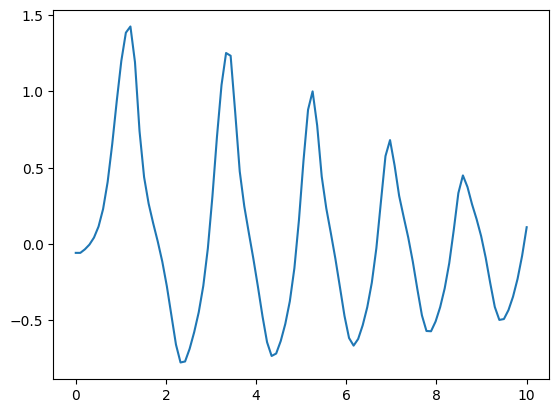

In [18]:
import matplotlib.pyplot as plt

u = controls.squeeze().detach().numpy()
times = times.detach().numpy()
plt.plot(times, u)